In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
df = pd.read_excel('DatosInvestigacion1-CargaCompleta.xlsx',parse_dates=True)
df.index.freq = 'MS'


In [15]:
df = pd.read_excel('DatosInvestigacion1-CargaCompleta.xlsx',index_col='AÑO',parse_dates=True)
df.head()

,ID,TITULO,MES,AUTORES,REVISTA,CITACIONES,REFERENCIAS
AÑO,,,,,,,
2019-01-01,1,Security modelling and assessment of modern ne...,Dec15,"Enoch, SY; Hong, JB and Kim, DS",JOURNAL OF NETWORK AND COMPUTER APPLICATIONS,5,52
2015-01-01,2,Formalization of security patterns as a means ...,Feb,"Varela-Vaca, AJ and Gasca, RM",LOGIC JOURNAL OF THE IGPL,5,32
2016-01-01,3,Catalytic Decomposition of N2O over Co-Ti Oxid...,Jun21,"Zhang, C; Zhang, ZP; (...); Zhu, YJ",CHEMCATCHEM,26,56
2022-01-01,4,Security of electronic personal health informa...,Mar4,"Chuma, KG and Ngoepe, M",INFORMATION SECURITY JOURNAL,1,59
2020-01-01,5,Reversible Fluorescence Switching of Metal-Org...,Apr24,"Venkateswarlu, S; Reddy, AS; (...); Yoon, MY",ACS APPLIED NANO MATERIALS,23,41


In [16]:
dfMes = pd.read_excel('DatosInvestigacion1-CargaCompleta.xlsx',index_col='MES',parse_dates=True)
dfMes.head()

,ID,TITULO,AÑO,AUTORES,REVISTA,CITACIONES,REFERENCIAS
MES,,,,,,,
Dec15,1,Security modelling and assessment of modern ne...,2019,"Enoch, SY; Hong, JB and Kim, DS",JOURNAL OF NETWORK AND COMPUTER APPLICATIONS,5,52
Feb,2,Formalization of security patterns as a means ...,2015,"Varela-Vaca, AJ and Gasca, RM",LOGIC JOURNAL OF THE IGPL,5,32
Jun21,3,Catalytic Decomposition of N2O over Co-Ti Oxid...,2016,"Zhang, C; Zhang, ZP; (...); Zhu, YJ",CHEMCATCHEM,26,56
Mar4,4,Security of electronic personal health informa...,2022,"Chuma, KG and Ngoepe, M",INFORMATION SECURITY JOURNAL,1,59
Apr24,5,Reversible Fluorescence Switching of Metal-Org...,2020,"Venkateswarlu, S; Reddy, AS; (...); Yoon, MY",ACS APPLIED NANO MATERIALS,23,41


In [17]:
df = pd.read_excel('DatosInvestigacion1-CargaCompleta.xlsx',index_col='AÑO',parse_dates=True)
df =df.sort_values('AÑO')
df = df.drop(['TITULO','MES','AUTORES','REVISTA','CITACIONES','REFERENCIAS'], axis=1)
df

,ID
AÑO,
2010-01-01,297
2010-01-01,637
2010-01-01,388
2010-01-01,45
2010-01-01,134
...,...
2022-01-01,148
2022-01-01,238
2022-01-01,4


In [19]:
dfMes = pd.read_excel('DatosInvestigacion1-CargaCompleta.xlsx',index_col='MES',parse_dates=True)
dfMes =dfMes.sort_values('MES')
dfMes = dfMes.drop(['TITULO','AÑO','AUTORES','REVISTA','CITACIONES','REFERENCIAS'], axis=1)
dfMes

,ID
MES,
Apr,594
Apr,660
Apr,25
Apr,659
Apr,688
...,...
Sep7,70
Sep8,550
Sept,190


<AxesSubplot:xlabel='AÑO'>

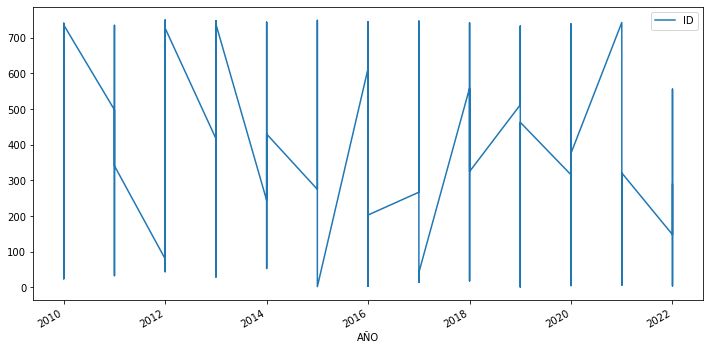

In [20]:
df.plot(figsize=(12,6))


<AxesSubplot:xlabel='MES'>

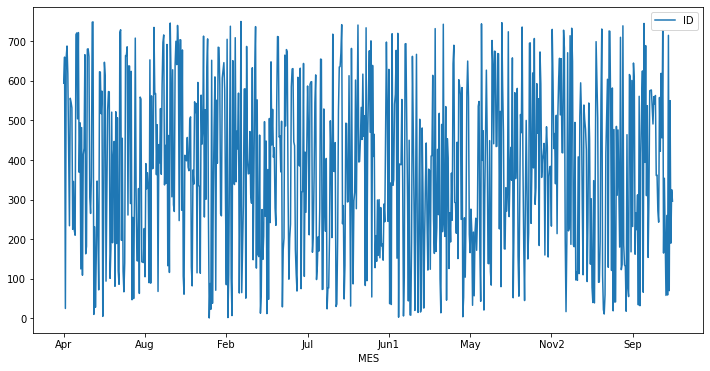

In [21]:
dfMes.plot(figsize=(12,6))

In [24]:
len(df)


750

In [28]:
train = df.iloc[:500]
test = df.iloc[500:]

train = dfMes.iloc[:500]
test = dfMes.iloc[500:]

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [27]:
df.head(),df.tail()

(             ID
 AÑO            
 2010-01-01  297
 2010-01-01  637
 2010-01-01  388
 2010-01-01   45
 2010-01-01  134,
              ID
 AÑO            
 2022-01-01  148
 2022-01-01  238
 2022-01-01    4
 2022-01-01  556
 2022-01-01  289)

In [30]:
dfMes.head(),dfMes.tail()

(      ID
 MES     
 Apr  594
 Apr  660
 Apr   25
 Apr  659
 Apr  688,
        ID
 MES      
 Sep7   70
 Sep8  550
 Sept  190
 Win   325
 Win   296)

In [31]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [32]:

scaled_train[:10]

array([[0.7917223 ],
       [0.87983979],
       [0.03204272],
       [0.87850467],
       [0.91722296],
       [0.82376502],
       [0.56608812],
       [0.31108144],
       [0.74098798],
       [0.72763685]])

In [33]:
from keras.preprocessing.sequence import TimeseriesGenerator

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# define generator
n_input = 1
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [107]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

NameError: name 'generator' is not defined

In [34]:
X.shape

NameError: name 'X' is not defined

In [ ]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

In [ ]:
scaled_test[0]

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred) 

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

In [ ]:
test.head()

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['ID'] = true_predictions

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['ID'],test['id']))
print(rmse)